In [1]:
import yaml
import networkx as nx
import matplotlib.pyplot as plt
from martignac.workflows.solute_solvation import SoluteSolvationFlow
from martignac.nomad.workflows import NomadWorkflow

24-02-23 10:36:51 - MDAnalysis.coordinates.AMBER - WARNING - netCDF4 is not available. Writing AMBER ncdf files will be slow.


In [2]:
project = SoluteSolvationFlow.get_project()
project

24-02-23 10:36:53 - numexpr.utils - INFO - Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
24-02-23 10:36:53 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


,sp.solvent_name,sp.solute_name,doc.solute_itp,doc.solute_top,doc.solute_name,doc.gromacs_logs,doc.solute_gro,doc.nomad_workflow,doc.solvent_top,doc.solvent_name,doc.solvent_gro,doc.solute_solvent_top,doc.solute_solvent_gro
e2ca9c695e8e441801a69128c7a26dd3,HD,P6,solute.itp,solute.top,P6,{'SoluteGenFlow': {'minimize': 'solute_min.log...,solute_min.gro,{'SoluteGenFlow': 'solute_generation.archive.y...,solvent_gen_box.top,HD,solvent_prod.gro,solute_solvent.top,solute_solvent_equ.gro


In [3]:
project.__class__.__name__

'SoluteSolvationFlow'

In [4]:
project._collect_operations()

[('generate_solute',
  <function martignac.workflows.solute_solvation.generate_solute(job)>),
 ('generate_solvent',
  <function martignac.workflows.solute_solvation.generate_solvent(job)>),
 ('solvate', <function martignac.workflows.solute_solvation.solvate(job)>),
 ('minimize', <function martignac.workflows.solute_solvation.minimize(job)>),
 ('equilibrate',
  <function martignac.workflows.solute_solvation.equilibrate(job)>),
 ('generate_nomad_workflow',
  <function martignac.workflows.solute_solvation.generate_nomad_workflow(job)>)]

In [5]:
project._collect_preconditions()

defaultdict(list,
            {<function martignac.workflows.solute_solvation.solvate(job)>: [<function martignac.workflows.solute_solvation.solute_generated(job) -> bool>,
              <function martignac.workflows.solute_solvation.solvent_generated(job) -> bool>],
             <function martignac.workflows.solute_solvation.minimize(job)>: [<function martignac.workflows.solute_solvation.system_generated(job)>],
             <function martignac.workflows.solute_solvation.equilibrate(job)>: [<function martignac.workflows.solute_solvation.system_minimized(job)>],
             <function martignac.workflows.solute_solvation.generate_nomad_workflow(job)>: [<function martignac.workflows.solute_solvation.system_equilibrated(job)>]})

In [6]:
project._collect_postconditions()

defaultdict(list,
            {<function martignac.workflows.solute_solvation.generate_solute(job)>: [<function martignac.workflows.solute_solvation.solute_generated(job) -> bool>],
             <function martignac.workflows.solute_solvation.generate_solvent(job)>: [<function martignac.workflows.solute_solvation.solvent_generated(job) -> bool>],
             <function martignac.workflows.solute_solvation.solvate(job)>: [<function martignac.workflows.solute_solvation.system_generated(job)>],
             <function martignac.workflows.solute_solvation.minimize(job)>: [<function martignac.workflows.solute_solvation.system_minimized(job)>],
             <function martignac.workflows.solute_solvation.equilibrate(job)>: [<function martignac.workflows.solute_solvation.system_equilibrated(job)>],
             <function martignac.workflows.solute_solvation.generate_nomad_workflow(job)>: [<function martignac.workflows.solute_solvation.<lambda>(job)>]})

In [7]:
jobs = list(project.find_jobs())
jobs

[Job(project=SoluteSolvationFlow('/Users/bereau/work/projects/martignac/scripts/martini_solvate'), statepoint={'solvent_name': 'HD', 'solute_name': 'P6'})]

In [8]:
job = jobs[0]
job

Job(project=SoluteSolvationFlow('/Users/bereau/work/projects/martignac/scripts/martini_solvate'), statepoint={'solvent_name': 'HD', 'solute_name': 'P6'})

In [6]:
job.project.__class__.__name__

'SoluteSolvationFlow'

In [7]:
workflow = NomadWorkflow(project, jobs[0])
workflow

NomadWorkflow(project=SoluteSolvationFlow('/Users/bereau/work/projects/martignac/scripts/martini_solvate'), job=Job(project=SoluteSolvationFlow('/Users/bereau/work/projects/martignac/scripts/martini_solvate'), statepoint={'solvent_name': 'HD', 'solute_name': 'P6'}), input_projects=None)

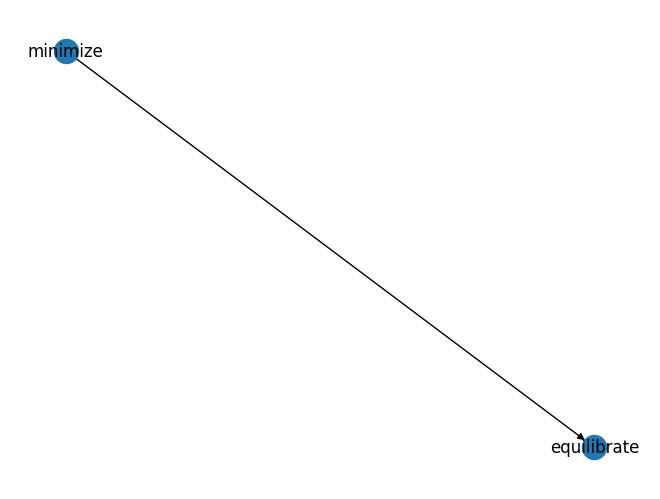

In [8]:
graph = workflow.graph
nx.draw(graph, with_labels=True)
plt.show()